In [105]:
import numpy as np
import pandas as pd
from sklearn.decomposition import *
from sklearn.neural_network import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline
from IPython.display import display
from sklearn.preprocessing import *

from ipywidgets import interact

In [2]:
df_wine = pd.read_csv('https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/wine-quality-classifier/dados/winequality-red.csv', sep=';')
df_wine.head()

,Acidez fixa,Acidez volátil,Ácido cítrico,Açúcar residual,Cloretos,Dióxido de enxofre livre,Dióxido de enxofre total,Densidade,pH,Sulfatos,Álcool,Qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Distribuição das features
df_wine.describe()

,Acidez fixa,Acidez volátil,Ácido cítrico,Açúcar residual,Cloretos,Dióxido de enxofre livre,Dióxido de enxofre total,Densidade,pH,Sulfatos,Álcool,Qualidade
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [38]:
sorted(df_wine['Qualidade'].unique())

[3, 4, 5, 6, 7, 8]

In [4]:
nm = Normalizer()
pd.DataFrame(
    nm.fit_transform(df_wine),
    columns=df_wine.columns
).head()

,Acidez fixa,Acidez volátil,Ácido cítrico,Açúcar residual,Cloretos,Dióxido de enxofre livre,Dióxido de enxofre total,Densidade,pH,Sulfatos,Álcool,Qualidade
0,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728
1,0.106989,0.012071,0.000000,0.035663,0.001344,0.342913,0.919006,0.013673,0.043893,0.009327,0.134422,0.068583
2,0.134949,0.013149,0.000692,0.039793,0.001592,0.259517,0.934261,0.017249,0.056402,0.011246,0.169551,0.086506
3,0.173611,0.004340,0.008681,0.029452,0.001163,0.263517,0.930059,0.015470,0.048983,0.008991,0.151910,0.093006
4,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728


In [16]:
# Normaliza os dados
df_std = pd.DataFrame(
    StandardScaler().fit_transform(df_wine.drop(['Qualidade'], axis=1)),
    columns=df_wine.columns.drop(['Qualidade'])
)

df_std['Qualidade'] = df_wine['Qualidade']

df_std.head()

,Acidez fixa,Acidez volátil,Ácido cítrico,Açúcar residual,Cloretos,Dióxido de enxofre livre,Dióxido de enxofre total,Densidade,pH,Sulfatos,Álcool,Qualidade
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5


In [12]:
mm = MinMaxScaler(feature_range=(0, 1))
pd.DataFrame(
    mm.fit_transform(df_wine),
    columns=df_wine.columns
).head()

/root/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Acidez fixa,Acidez volátil,Ácido cítrico,Açúcar residual,Cloretos,Dióxido de enxofre livre,Dióxido de enxofre total,Densidade,pH,Sulfatos,Álcool,Qualidade
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [42]:
# Classifica as notas(3 a 5 = 0; 6 a 8 = 1)
def redimensiona(x):
    if x <= 4:
        return 0
    elif x <= 6:
        return 1
    return 2
    
df_wine['Qualidade'] = df_wine['Qualidade'].apply(redimensiona)

# Exibe gráfico
#df_wine.groupby('Qualidade').count()['Álcool'].plot(kind='bar', title='Vinhos bons(1) e ruins(0)')

In [93]:
# Visualizando a distribuição dos vinhos por qualidade
pca = PCA(n_components=3)

df_pca = pca.fit_transform(
    df_std.drop(['Qualidade'], axis=1)
)
df_pca = pd.DataFrame(df_pca, columns=['pca1','pca2','pca3'])

df_pca['pca1'].head()

0   -1.619530
1   -0.799170
2   -0.748479
3    2.357673
4   -1.619530
Name: pca1, dtype: float64

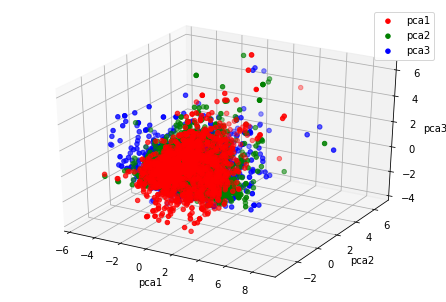

interactive(children=(IntSlider(value=10, description='dist', max=20, min=1), Output()), _dom_classes=('widget…

In [109]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b')

x = df_pca['pca1']
y = df_pca['pca2']
z = df_pca['pca3']
x_list = ['r'] * len(x)
y_list = ['g'] * len(y)
z_list = ['b'] * len(z)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x,y) points are plotted on the x and z axes.
ax.scatter(x, y, z, zdir='x', c=x_list, label='pca1')
ax.scatter(x, y, z, zdir='y', c=y_list, label='pca2')
ax.scatter(x, y, z, zdir='z', c=z_list, label='pca3')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
@interact(dist=(1, 20, 1))
def update(dist=10):
    ax.view_init(elev=20., azim=-35)
    ax.dist = dist
    display(fig);

In [111]:
from sklearn.decomposition import NMF

df = pd.read_csv('https://raw.githubusercontent.com/rafjaa/curso-mineracao-de-dados-aplicada/master/data/df_noticias_if.csv')
df.head()

,data,titulo,conteudo
0,14/09/2017,Campus Barbacena divulga Resultado Provisório ...,\n\n\tO Campus Barbacena divulgou o Resultado ...
1,14/09/2017,Divulgado o Edital de convocação de assembleia...,\n\n\tDivulgado o Edital de convocação de asse...
2,14/09/2017,Pesquisador da Bélgica realiza palestra no Cam...,"\n\n\tO pesquisador da Bélgica, Luc Vankrunkel..."
3,14/09/2017,Divulgada a homologação das inscrições à candi...,\n\n\tDivulgada a homologação das inscrições à...
4,14/09/2017,"Aprovado Regulamento de Eventos, Cerimonial e ...","\n\n\tO Regulamento, aprovado no dia 05 de set..."


In [116]:
# Tokenização com nltk
from nltk import word_tokenize
# Remoção de pontuação
from string import punctuation

import nltk

stopwords = nltk.corpus.stopwords.words('portuguese')

# Gerando uma coluna de texto pré-processado (título + conteúdo)
def processa(row):
    txt = row['titulo'] + ' ' + row['conteudo']
    
    return ' '.join([t for t in word_tokenize(txt.lower()) if (t not in stopwords) and (t not in punctuation)])

df['doc'] = df.apply(processa, axis=1)

df['doc'].head()

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(df['doc'])

tfidf_matrix

<1000x10987 sparse matrix of type '<class 'numpy.float64'>'
	with 67457 stored elements in Compressed Sparse Row format>

In [120]:
from sklearn.decomposition import NMF

In [123]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

num_topics = 25

nmf_model = NMF(
    n_components=num_topics,
    random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd'
).fit(tfidf_matrix)

nmf_W = nmf_model.transform(tfidf_matrix)

nmf_H = nmf_model.components_

print('Matriz W: ', nmf_W.shape)
print('Matriz H: ', nmf_H.shape, '\n')

Matriz W:  (1000, 25)
Matriz H:  (25, 10987) 



In [132]:
pd.DataFrame(nmf_W[1], columns=['W'])

,W
0,0.000000
1,0.004179
2,0.385717
3,0.000000
4,0.054716
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,0.000000
